In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# Read the CSV file
df_features = pd.read_csv('Data_Feature_Selected_v3.csv')
df_features.head()

,cap-diameter,cap-shape,cap-surface,cap-color,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,ring-type,habitat
0,1.619462,6,2,6,2,0,10,3.076705,0.492293,11,2,0
1,1.873982,6,2,6,2,0,10,3.385311,0.601900,11,2,0
2,1.393432,6,2,6,2,0,10,3.328931,0.557061,11,2,0
3,1.412426,2,3,1,2,0,10,2.726555,0.381690,11,5,0
4,1.501699,6,3,6,2,0,10,2.952075,0.503254,11,5,0


In [3]:
# Read the labels CSV file
print(df_features.shape)
df_labels = pd.read_csv('Labels.csv')

(61069, 12)


In [4]:
# Unique values in the labels
df_labels['class'].unique()

array(['p', 'e'], dtype=object)

In [5]:
# Retrieve the features and labels
X = df_features.values
y = df_labels.values

# Replace labels with 0 and 1
y[y == 'p'] = 0
y[y == 'e'] = 1

y = [o[0] for o in y]

In [6]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict the labels
y_pred_test = log_reg.predict(X_test)

# Accuracy score
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

Logistic Regression Accuracy: 0.622609379093529
[[6407 2080]
 [3682 3099]]
              precision    recall  f1-score   support

           0       0.64      0.75      0.69      8487
           1       0.60      0.46      0.52      6781

    accuracy                           0.62     15268
   macro avg       0.62      0.61      0.60     15268
weighted avg       0.62      0.62      0.61     15268



In [8]:
# Random Forest Classifier
rfc = RandomForestClassifier(max_depth=10, n_estimators=100)

# Fit the model
rfc.fit(X_train, y_train)

# Predict the labels
y_pred_test = rfc.predict(X_test)

# Accuracy score
print(f"Random Forest Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

Random Forest Classifier Accuracy: 0.9821194655488603
[[8240  247]
 [  26 6755]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8487
           1       0.96      1.00      0.98      6781

    accuracy                           0.98     15268
   macro avg       0.98      0.98      0.98     15268
weighted avg       0.98      0.98      0.98     15268



In [9]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(max_depth=10, n_estimators=100)

# Fit the model
gbc.fit(X_train, y_train)

# Predict the labels
y_pred_test = gbc.predict(X_test)

# Accuracy score
print(f"Gradient Boosting Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

Gradient Boosting Classifier Accuracy: 0.9993450353680902
[[8479    8]
 [   2 6779]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8487
           1       1.00      1.00      1.00      6781

    accuracy                           1.00     15268
   macro avg       1.00      1.00      1.00     15268
weighted avg       1.00      1.00      1.00     15268



In [10]:
# Naive Bayes Classifier
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predict the labels
y_pred_test = gnb.predict(X_test)

# Accuracy score
print(f"Naive Bayes Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

Naive Bayes Classifier Accuracy: 0.590319622740372
[[6508 1979]
 [4276 2505]]
              precision    recall  f1-score   support

           0       0.60      0.77      0.68      8487
           1       0.56      0.37      0.44      6781

    accuracy                           0.59     15268
   macro avg       0.58      0.57      0.56     15268
weighted avg       0.58      0.59      0.57     15268



In [11]:
# SVM Classifier
from sklearn.svm import SVC
svc = SVC()

# Fit the model
svc.fit(X_train, y_train)

# Predict the labels
y_pred_test = svc.predict(X_test)

# Accuracy score
print(f"SVM Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

SVM Classifier Accuracy: 0.9599161645271156
[[8073  414]
 [ 198 6583]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      8487
           1       0.94      0.97      0.96      6781

    accuracy                           0.96     15268
   macro avg       0.96      0.96      0.96     15268
weighted avg       0.96      0.96      0.96     15268



In [12]:
# K-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Predict the labels
y_pred_test = knn.predict(X_test)

# Accuracy score
print(f"KNN Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

c:\Users\siya1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Classifier Accuracy: 0.9988210636625622
[[8473   14]
 [   4 6777]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8487
           1       1.00      1.00      1.00      6781

    accuracy                           1.00     15268
   macro avg       1.00      1.00      1.00     15268
weighted avg       1.00      1.00      1.00     15268



### Principal Component Analysis

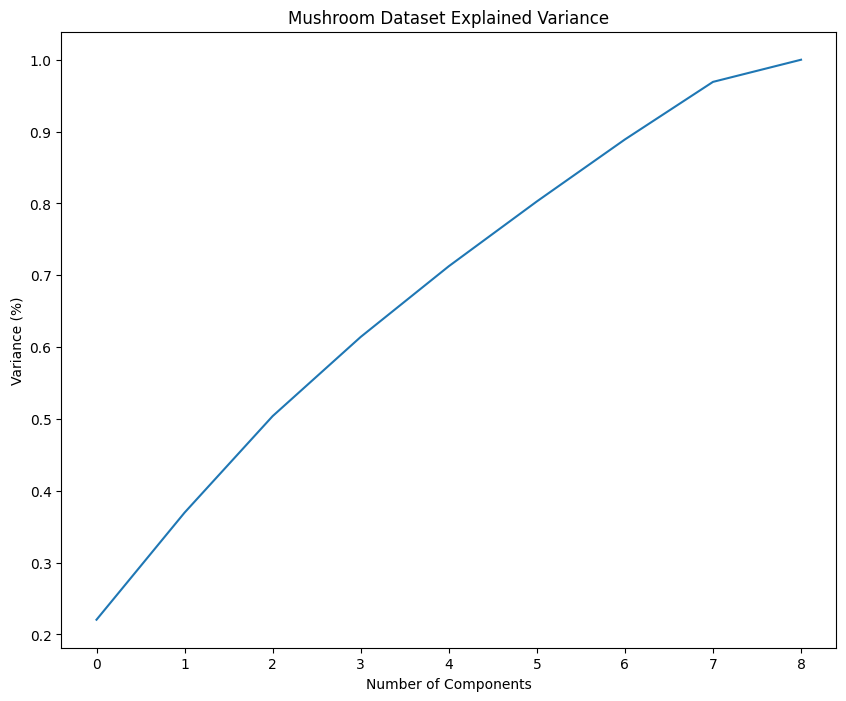

In [13]:
# Import PCA
from sklearn.decomposition import PCA

# Plot the PCA spectrum
pca = PCA().fit(X)

plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Mushroom Dataset Explained Variance')
plt.show()

In [14]:
# Take 85% of the variance
pca = PCA(0.85)

# Fit PCA
pca.fit(X)

# Transform the data
X = pca.transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
# Logistic Regression
log_reg_pca = LogisticRegression(max_iter=1000)

# Fit the model
log_reg_pca.fit(X_train, y_train)

# Predict the labels
y_pred_test = log_reg_pca.predict(X_test)

# Accuracy score
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

Logistic Regression Accuracy: 0.6211684569033272
[[6758 1729]
 [4055 2726]]
              precision    recall  f1-score   support

           0       0.62      0.80      0.70      8487
           1       0.61      0.40      0.49      6781

    accuracy                           0.62     15268
   macro avg       0.62      0.60      0.59     15268
weighted avg       0.62      0.62      0.60     15268



In [16]:
# Random Forest Classifier
rfc_pca = RandomForestClassifier(max_depth=10, n_estimators=100)

# Fit the model
rfc_pca.fit(X_train, y_train)

# Predict the labels
y_pred_test = rfc_pca.predict(X_test)

# Accuracy score
print(f"Random Forest Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

Random Forest Classifier Accuracy: 0.9488472622478387
[[8033  454]
 [ 327 6454]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8487
           1       0.93      0.95      0.94      6781

    accuracy                           0.95     15268
   macro avg       0.95      0.95      0.95     15268
weighted avg       0.95      0.95      0.95     15268



In [17]:
# Gradient Boosting Classifier
gbc_pca = GradientBoostingClassifier(max_depth=10, n_estimators=100)

# Fit the model
gbc_pca.fit(X_train, y_train)

# Predict the labels
y_pred_test = gbc_pca.predict(X_test)

# Accuracy score
print(f"Gradient Boosting Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

Gradient Boosting Classifier Accuracy: 0.9933193607545192
[[8443   44]
 [  58 6723]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8487
           1       0.99      0.99      0.99      6781

    accuracy                           0.99     15268
   macro avg       0.99      0.99      0.99     15268
weighted avg       0.99      0.99      0.99     15268



In [18]:
# Naive Bayes Classifier
gnb_pca = GaussianNB()

# Fit the model
gnb_pca.fit(X_train, y_train)

# Predict the labels
y_pred_test = gnb_pca.predict(X_test)

# Accuracy score
print(f"Naive Bayes Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

Naive Bayes Classifier Accuracy: 0.5959523185747969
[[6478 2009]
 [4160 2621]]
              precision    recall  f1-score   support

           0       0.61      0.76      0.68      8487
           1       0.57      0.39      0.46      6781

    accuracy                           0.60     15268
   macro avg       0.59      0.57      0.57     15268
weighted avg       0.59      0.60      0.58     15268



In [19]:
# SVM Classifier
svc_pca = SVC()

# Fit the model
svc_pca.fit(X_train, y_train)

# Predict the labels
y_pred_test = svc_pca.predict(X_test)

# Accuracy score
print(f"SVM Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

SVM Classifier Accuracy: 0.888328530259366
[[7569  918]
 [ 787 5994]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      8487
           1       0.87      0.88      0.88      6781

    accuracy                           0.89     15268
   macro avg       0.89      0.89      0.89     15268
weighted avg       0.89      0.89      0.89     15268



In [20]:
# K-nearest neighbors classifier
knn_pca = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_pca.fit(X_train, y_train)

# Predict the labels
y_pred_test = knn_pca.predict(X_test)

# Accuracy score
print(f"KNN Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

c:\Users\siya1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Classifier Accuracy: 0.9935158501440923
[[8438   49]
 [  50 6731]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8487
           1       0.99      0.99      0.99      6781

    accuracy                           0.99     15268
   macro avg       0.99      0.99      0.99     15268
weighted avg       0.99      0.99      0.99     15268

